In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = {
    'Jumlah_SKS': [20, 22, 19, 24, 21, 18, 25, 26, 19, 17],  #dalam SKS
    'IPK': [3.0, 3.2, 2.8, 3.5, 3.1, 2.6, 3.7, 3.9, 2.9, 2.5],  #Indeks Prestasi Kumulatif
    'Pertemuan_Hadir': [12, 14, 10, 15, 13, 9, 16, 18, 11, 8],  #Jumlah pertemuan yang dihadiri
    'Lulus': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]  #1 = Lulus, 0 = Tidak Lulus
}

In [5]:
df = pd.DataFrame(data)

In [6]:
print("Data Mahasiswa di Indonesia:\n", df)

Data Mahasiswa di Indonesia:
    Jumlah_SKS  IPK  Pertemuan_Hadir  Lulus
0          20  3.0               12      1
1          22  3.2               14      1
2          19  2.8               10      0
3          24  3.5               15      1
4          21  3.1               13      1
5          18  2.6                9      0
6          25  3.7               16      1
7          26  3.9               18      1
8          19  2.9               11      0
9          17  2.5                8      0


In [7]:
X = df[['Jumlah_SKS', 'IPK', 'Pertemuan_Hadir']]  # Fitur
y = df['Lulus']  # Target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



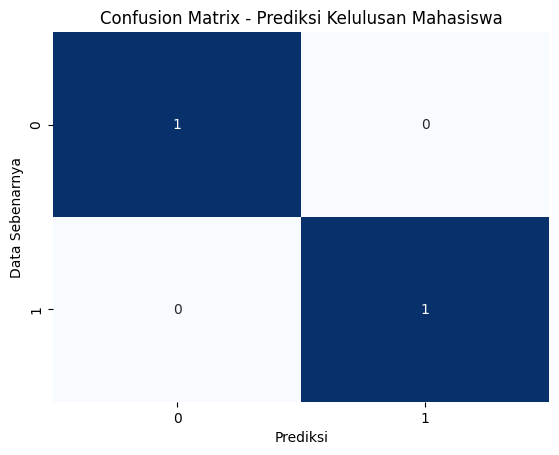

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Data Sebenarnya')
plt.title('Confusion Matrix - Prediksi Kelulusan Mahasiswa')
plt.show()